In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
print(decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it t

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [5]:
print(x_train.shape)

(25000, 10000)


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics


model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),                    
])

# model.compile(
#     optimizer=optimizers.rmsprop_v2.RMSprop(lr=0.001),
#     loss=losses.binary_crossentropy,
#     metrics=[metrics.accuracy]
# )
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(
    partial_x_train, 
    partial_y_train, 
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6698 - loss: 0.6193 - val_accuracy: 0.8604 - val_loss: 0.4157
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8893 - loss: 0.3585 - val_accuracy: 0.8834 - val_loss: 0.3172
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9208 - loss: 0.2526 - val_accuracy: 0.8689 - val_loss: 0.3205
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9355 - loss: 0.2014 - val_accuracy: 0.8880 - val_loss: 0.2790
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9473 - loss: 0.1662 - val_accuracy: 0.8854 - val_loss: 0.2791
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.1331 - val_accuracy: 0.8865 - val_loss: 0.2828
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9612 - loss: 0.1229 - val_accuracy: 0.8703 - val_loss: 0.3450
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9741 - loss: 0.0972 - val_accuracy: 0.8740 - val_loss

In [10]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


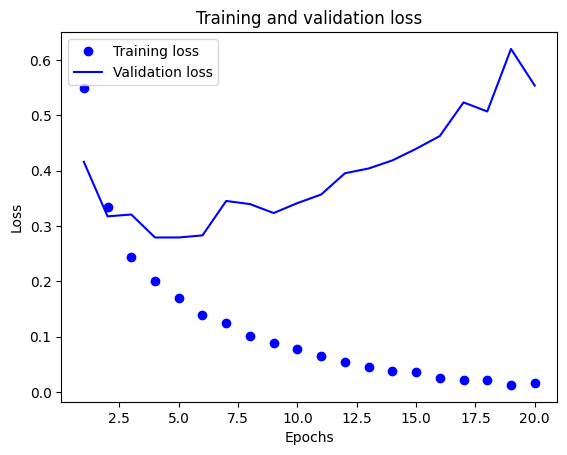

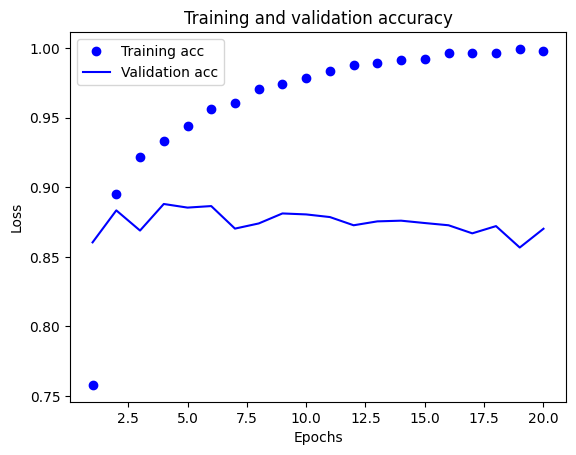

In [11]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [12]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.8555 - loss: 0.6139
[0.6025903224945068, 0.8585600256919861]


In [13]:
result = model.predict(x_test[0, :].reshape(1, 10000))
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.01940786]]


In [14]:
from keras import layers

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.5997
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8977 - loss: 0.3355
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9163 - loss: 0.2439
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9293 - loss: 0.2011
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8812 - loss: 0.2913
[0.2926085889339447, 0.8809199929237366]


In [15]:
results = model.evaluate(x_test, y_test)
result = model.predict(x_test[0, :].reshape(1, 10000))
print(result)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.8812 - loss: 0.2913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.17977886]]
